# Contents

### 1. Importing the essential Python Libraries
### 2. Loading the Dataset
### 3. Exploration of the given Data
### 4. Handling of Duplicates
### 5. Handle Missing Values
### 6. Handling of Outliers
### 7. Univariate Analysis
### 8. Bivariate Analysis
### 9. Multivariate Analysis

### 1. Importing the essential Python Libraries

In [1]:
# Importing the essentail libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotnine


### 2. Loading the Dataset

In [2]:
df = pd.read_csv('agridata_csv_202110311352.csv')
df.head()

# Commodity Name	Name of the Commodity (String)
# State	State Name (String)
# District	District Name (String)
# Market	Market Name (String)
# Min Price	Minimum Price ( Quintal => Kg Converted ) (Float)
# Max Price	Maximum Price ( Quintal => Kg Converted ) (Float)
# Modal Price	Maximum Price ( Quintal => Kg Converted ) (Float)
# Region	Which part of India ?
# Date	Date on which the data is obtained

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,22-05-2019
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,22-05-2019
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,22-05-2019
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,22-05-2019
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,22-05-2019


### 3. Exploration of the given Data

In [5]:
df.head(10)

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,22-05-2019
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,22-05-2019
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,22-05-2019
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,22-05-2019
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,22-05-2019
5,Ajwan,Madhya Pradesh,Neemuch,Neemuch,80.00,132.00,95.00,22-05-2019
6,Ajwan,Rajasthan,Chittorgarh,Nimbahera,9.77,9.95,9.80,22-05-2019
7,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,100.50,120.90,110.70,22-05-2019
8,Alasande+Gram,Karnataka,Bagalkot,Bagalakot,46.01,46.50,46.46,22-05-2019
9,Alasande+Gram,Karnataka,Bangalore,Bangalore,48.00,53.00,50.50,22-05-2019


In [6]:
df.tail(10)

,commodity_name,state,district,market,min_price,max_price,modal_price,date
836967,Arhar (Tur/Red Gram)(Whole),Chattisgarh,Rajnandgaon,Rajnandgaon,4050.0,5501.0,5501.0,06-10-2021
836968,Arhar (Tur/Red Gram)(Whole),Gujarat,Botad,Botad,3800.0,5000.0,4400.0,06-10-2021
836969,Arhar (Tur/Red Gram)(Whole),Gujarat,Dahod,Dahod,5300.0,5700.0,5500.0,06-10-2021
836970,Arhar (Tur/Red Gram)(Whole),Gujarat,Dahod,Dahod,6000.0,5800.0,0.0,06-10-2021
836971,Arhar (Tur/Red Gram)(Whole),Gujarat,Bharuch,Jambusar,5000.0,5400.0,5200.0,06-10-2021
836972,Arhar (Tur/Red Gram)(Whole),Gujarat,Bharuch,Jambusar(Kaavi),5100.0,5500.0,5300.0,06-10-2021
836973,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Jasdan,3500.0,5500.0,5000.0,06-10-2021
836974,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Rajkot,5300.0,6225.0,5650.0,06-10-2021
836975,Arhar (Tur/Red Gram)(Whole),Gujarat,Junagarh,Visavadar,4750.0,5750.0,5250.0,06-10-2021
836976,Arhar (Tur/Red Gram)(Whole),Kerala,Kasargod,Neeleswaram,10500.0,11500.0,11000.0,06-10-2021


In [7]:
df.shape

(836977, 8)

In [8]:
df.columns

Index(['commodity_name', 'state', 'district', 'market', 'min_price',
       'max_price', 'modal_price', 'date'],
      dtype='object')

In [9]:
df['district'].value_counts()

Bulandshahar        12430
Muzaffarnagar       11513
Saharanpur          11049
Etah                10669
Agra                10572
                    ...  
Theni                   2
Krishnagiri             2
Thiruchirappalli        1
Vijayanagaram           1
3000                    1
Name: district, Length: 487, dtype: int64

In [10]:
df.dtypes

commodity_name     object
state              object
district           object
market             object
min_price         float64
max_price         float64
modal_price       float64
date               object
dtype: object

In [11]:
df.count()

commodity_name    836977
state             836977
district          836977
market            836977
min_price         836976
max_price         836976
modal_price       836976
date              836976
dtype: int64

In [12]:
df.info()
# Getting the information related to the Data type of all the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836977 entries, 0 to 836976
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836977 non-null  object 
 1   state           836977 non-null  object 
 2   district        836977 non-null  object 
 3   market          836977 non-null  object 
 4   min_price       836976 non-null  float64
 5   max_price       836976 non-null  float64
 6   modal_price     836976 non-null  float64
 7   date            836976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 51.1+ MB


In [13]:
df.describe()

# It will give statistical information of all numerical features in our dataset
# Count - count of the values
# mean - average of the values
# std - standard deviation
# min - minimum values as compared to the other values
# 25% - first quartile
# 50% - second quartile of near to the median
# 75% - third quartile
# max - maximum values as compared to the other values

,min_price,max_price,modal_price
count,836976.000000,836976.000000,836976.000000
mean,138.445995,158.565246,117.538995
std,1622.392619,1710.408830,1230.096978
min,0.000000,0.000000,0.000000
25%,12.000000,15.500000,14.100000
50%,20.000000,25.000000,22.650000
75%,37.500000,45.000000,41.000000
max,80200.000000,74240.000000,66000.000000


### 4. Handling of Duplicates

In [14]:
# By setting keep on 'False', all duplicates are 'True'.
df.duplicated(keep  = False)

0         False
1         False
2         False
3         False
4         False
          ...  
836972    False
836973    False
836974    False
836975    False
836976    False
Length: 836977, dtype: bool

In [15]:
df.duplicated().sum()

120

In [16]:
len(df)

836977

In [17]:
df = df.drop_duplicates()
len(df)

836857

### 5. Handle Missing Values

In [18]:
df.isnull().sum()

commodity_name    0
state             0
district          0
market            0
min_price         1
max_price         1
modal_price       1
date              1
dtype: int64

##### Dealing with the missing values in "max_price" column

In [19]:
index = df[df['max_price'].isnull()].index
index

Int64Index([834337], dtype='int64')

In [20]:
df = df.drop(index)
df.isnull().sum()
# Here we can see that the all of the missing values are gone

commodity_name    0
state             0
district          0
market            0
min_price         0
max_price         0
modal_price       0
date              0
dtype: int64

### 6. Handling of Outliers

In [21]:
df2 = df.copy(deep = True)

In [22]:
df2.columns

Index(['commodity_name', 'state', 'district', 'market', 'min_price',
       'max_price', 'modal_price', 'date'],
      dtype='object')

In [23]:
df2.describe()

,min_price,max_price,modal_price
count,836856.000000,836856.000000,836856.000000
mean,137.931605,157.929153,117.029559
std,1621.643182,1709.301979,1228.919638
min,0.000000,0.000000,0.000000
25%,12.000000,15.500000,14.100000
50%,20.000000,25.000000,22.650000
75%,37.500000,45.000000,41.000000
max,80200.000000,74240.000000,66000.000000


In [24]:
# Making copy of the Dataset Again for removal of Outliers
data = df2.copy(deep = True)
data.describe()

,min_price,max_price,modal_price
count,836856.000000,836856.000000,836856.000000
mean,137.931605,157.929153,117.029559
std,1621.643182,1709.301979,1228.919638
min,0.000000,0.000000,0.000000
25%,12.000000,15.500000,14.100000
50%,20.000000,25.000000,22.650000
75%,37.500000,45.000000,41.000000
max,80200.000000,74240.000000,66000.000000


In [25]:

e0=data.min_price.min()
e100=data.min_price.max()
min_price1=data.min_price.quantile(0.25)
min_price2=data.min_price.quantile(0.5)
min_price3=data.min_price.quantile(0.75)
IQR=min_price3-min_price1
lf1 = min_price1 - 1.5*IQR
uf1 = min_price3 + 1.5*IQR


e2=data.max_price.min()
e300=data.max_price.max()
max_price1=data.max_price.quantile(0.25)
max_price2=data.max_price.quantile(0.5)
max_price3=data.max_price.quantile(0.75)
IQR=max_price3-max_price1
lf2 = max_price1 - 1.5*IQR
uf2 = max_price3 + 1.5*IQR


e4=data.modal_price.min()
e500=data.modal_price.max()
modal_price1=data.modal_price.quantile(0.25)
modal_price2=data.modal_price.quantile(0.5)
modal_price3=data.modal_price.quantile(0.75)
IQR=modal_price3-modal_price1
lf3 = modal_price1 - 1.5*IQR
uf3 = modal_price3 + 1.5*IQR



### Handling min_price

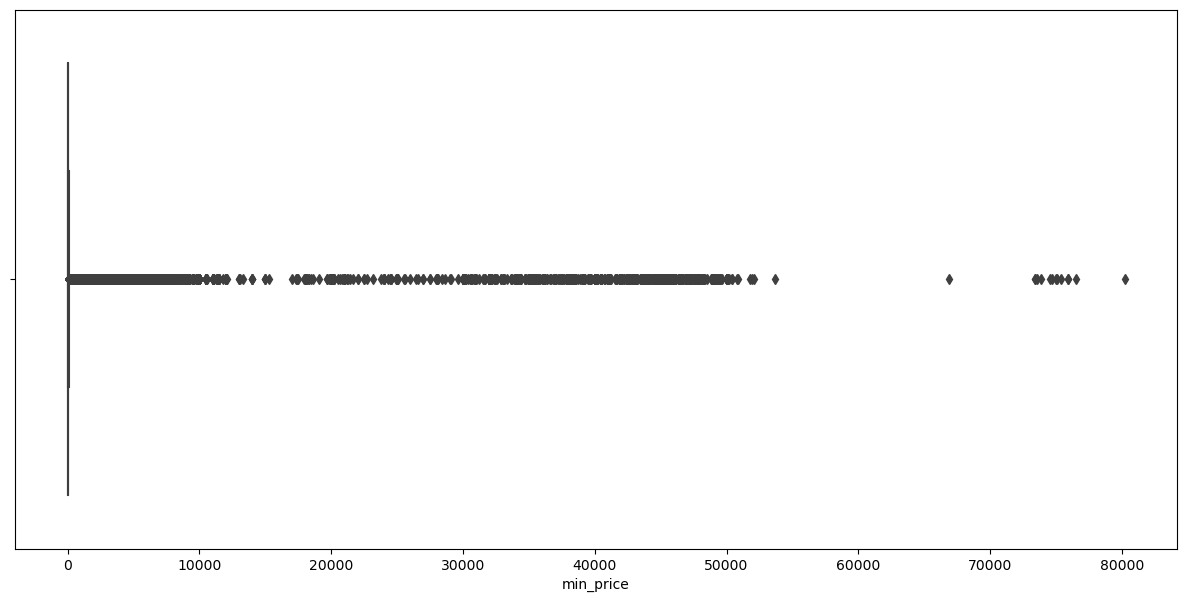

In [26]:
plt.figure(figsize = (15,7))
sns.boxplot(data,x = "min_price")
plt.show()

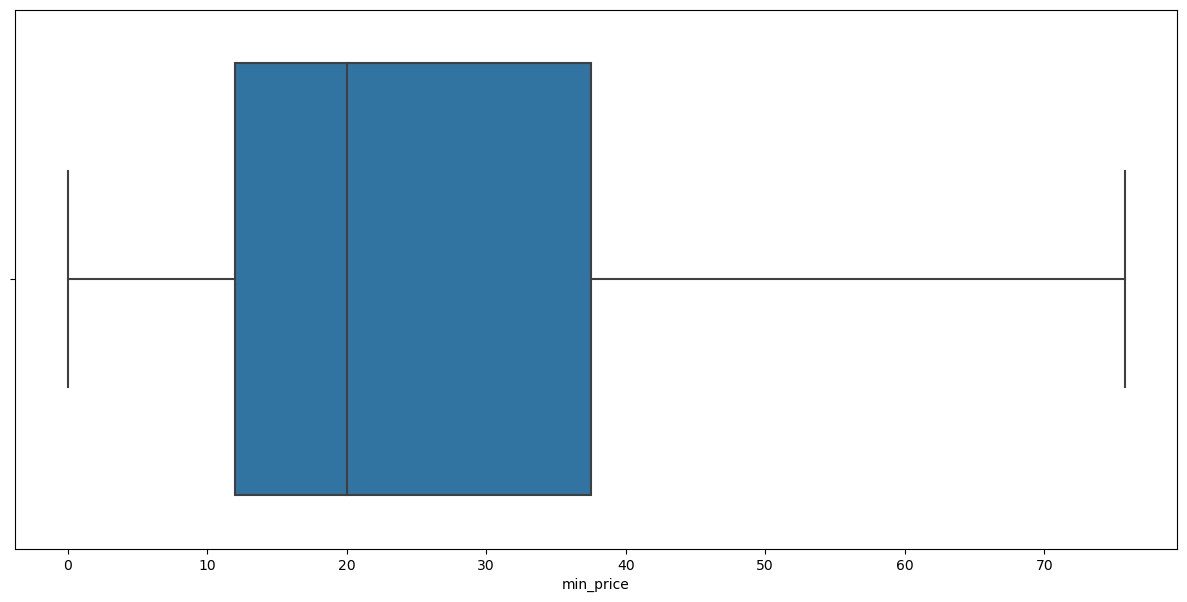

In [27]:
data.min_price.clip(lower = lf1,upper=uf1,inplace=True)
plt.figure(figsize = (15,7))
sns.boxplot(data,x = "min_price")
plt.show()

### Handling max_price

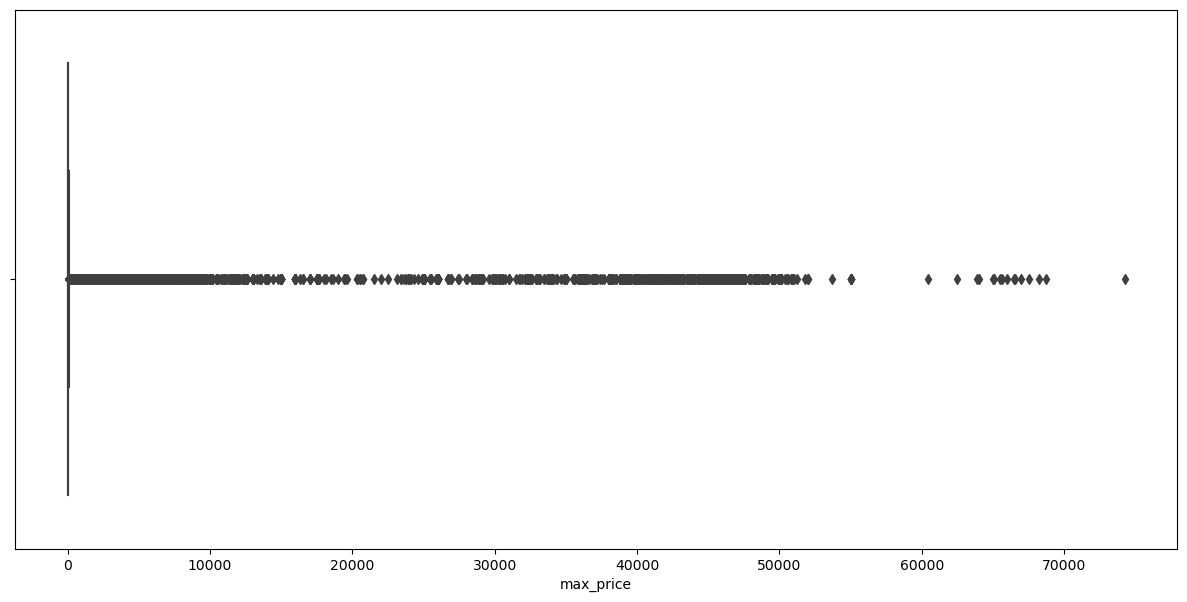

In [28]:
plt.figure(figsize = (15,7))
sns.boxplot(data,x = "max_price")
plt.show()

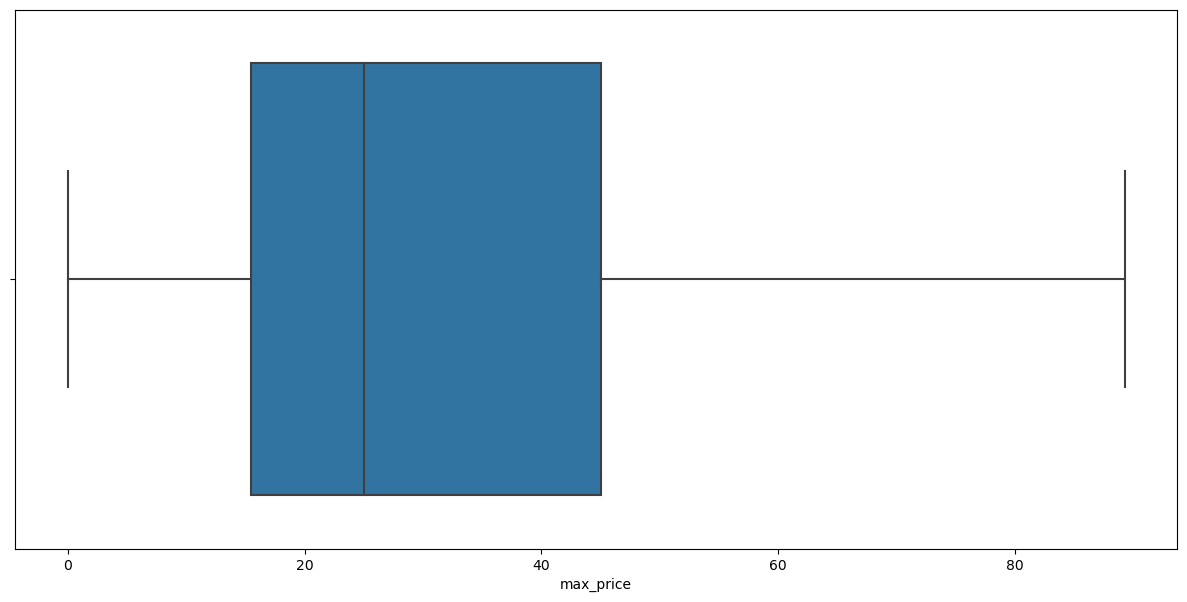

In [29]:
data.max_price.clip(lower = lf2,upper=uf2,inplace=True)
plt.figure(figsize = (15,7))
sns.boxplot(data,x = "max_price")
plt.show()

### Handling modal_price

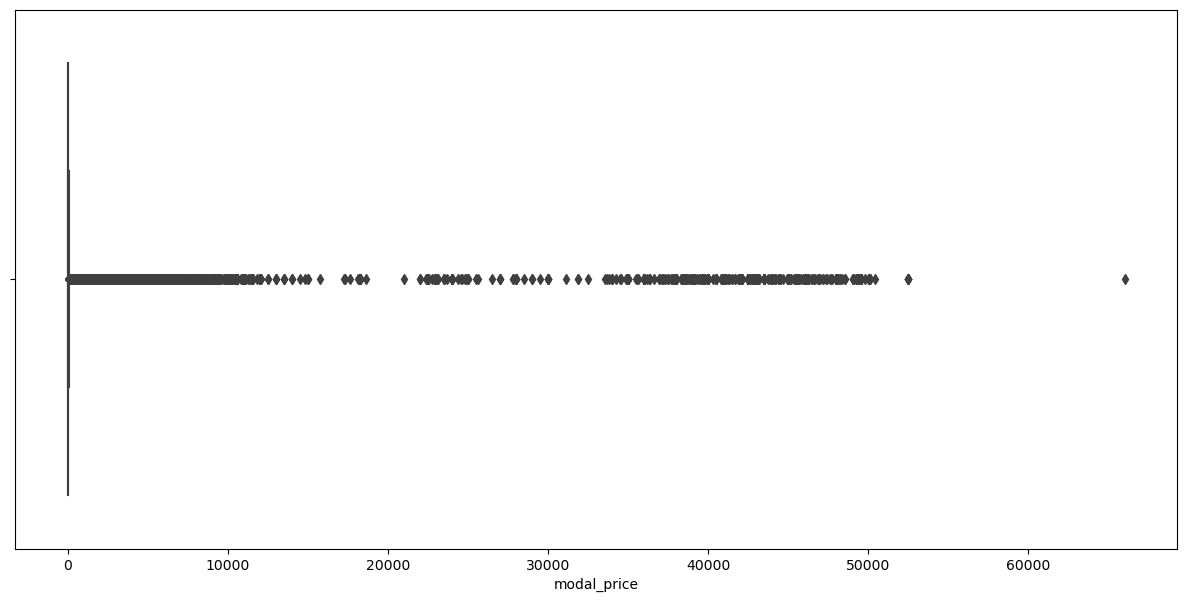

In [30]:
plt.figure(figsize = (15,7))
sns.boxplot(data,x = "modal_price")
plt.show()

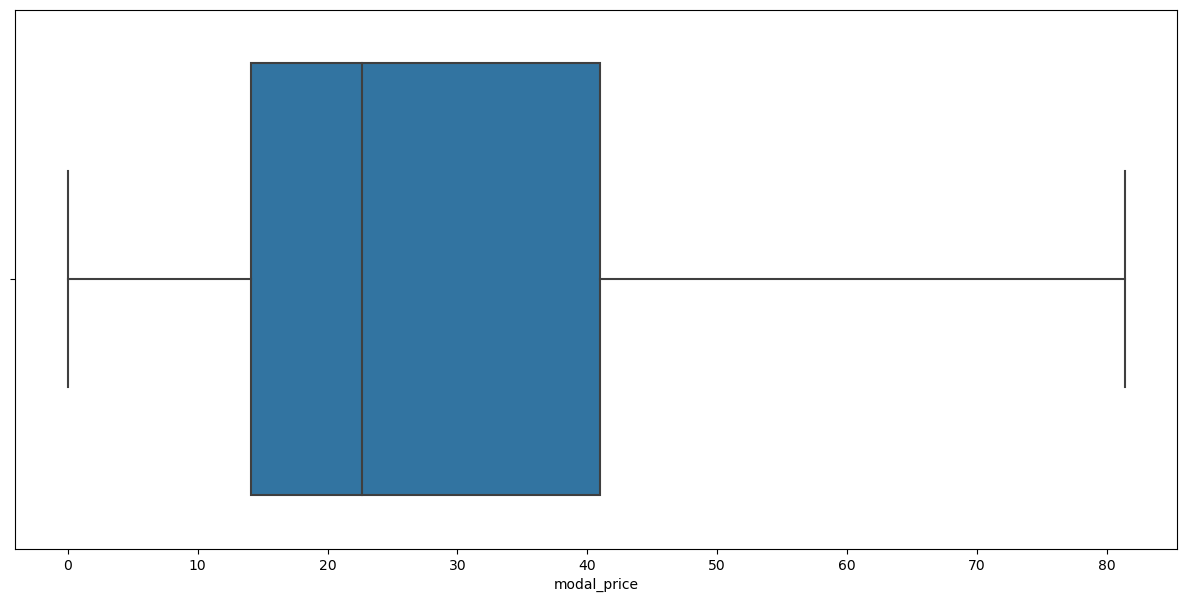

In [31]:
data.modal_price.clip(lower = lf3,upper=uf3,inplace=True)
plt.figure(figsize = (15,7))
sns.boxplot(data,x = "modal_price")
plt.show()

### 7. Univariate Analysis

In [56]:
data.columns

Index(['commodity_name', 'state', 'district', 'market', 'min_price',
       'max_price', 'modal_price', 'date'],
      dtype='object')

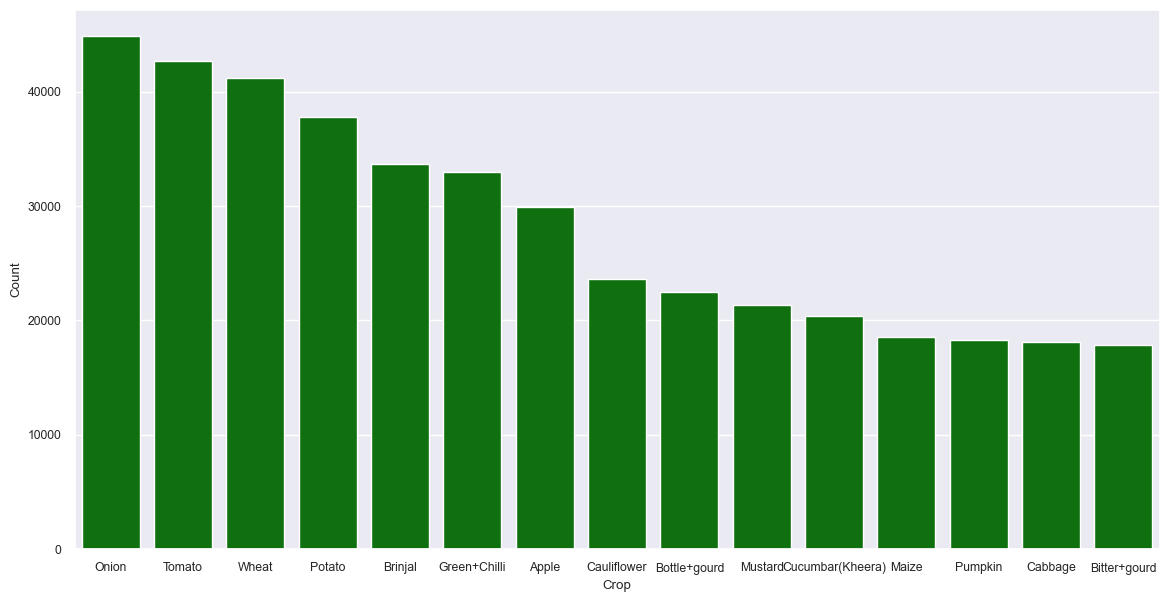

In [74]:
df_ = data['commodity_name'].value_counts()[0:15].rename_axis("Crop").reset_index(name = "Count")
plt.figure(figsize = (14,7))
sns.set_theme(font_scale = 0.8)
sns.barplot(data = df_,x = "Crop",y = "Count",color = "green")
plt.show()

### 8. Bivariate Analysis

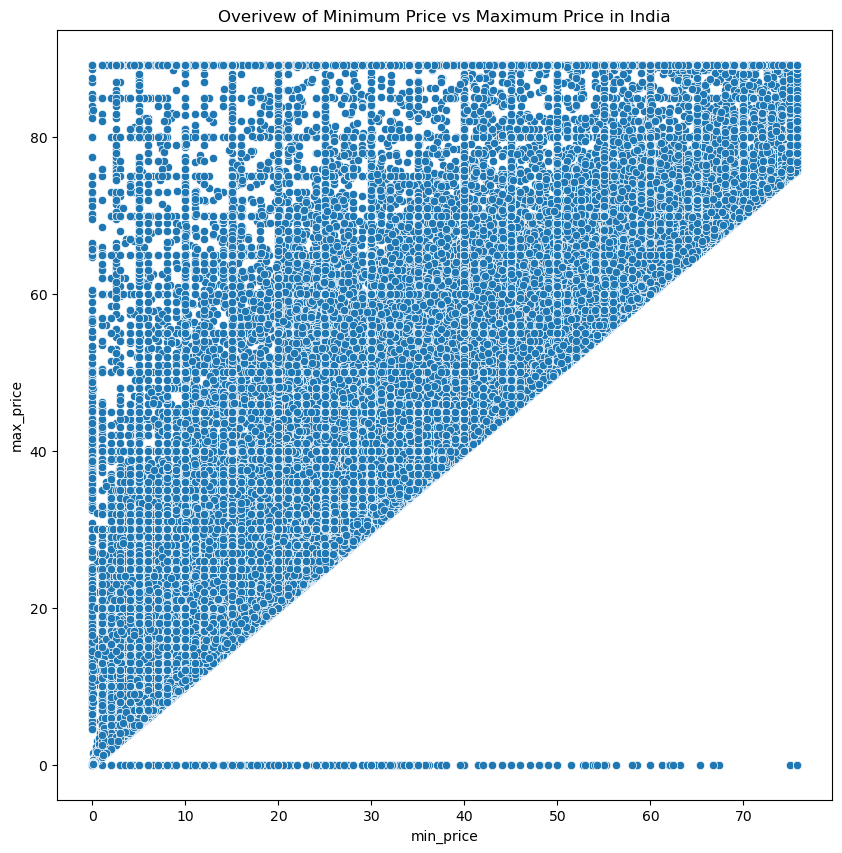

In [59]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = data['min_price'],y = data['max_price'])
plt.title("Overivew of Minimum Price vs Maximum Price in India")
plt.show()

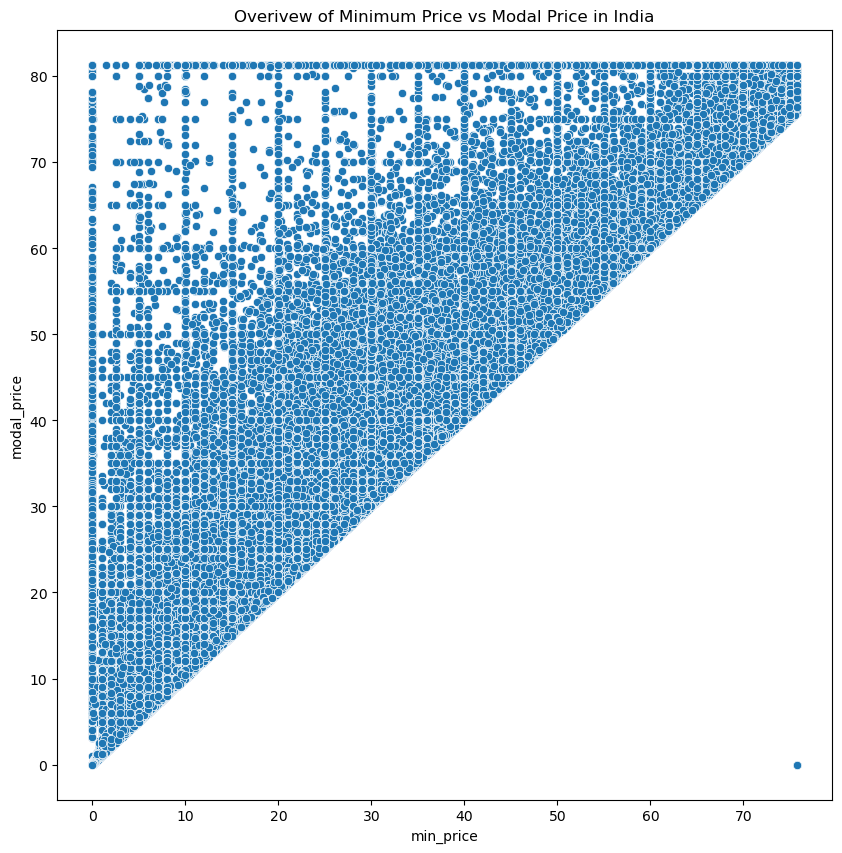

In [60]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = data['min_price'],y = data['modal_price'])
plt.title("Overivew of Minimum Price vs Modal Price in India")
plt.show()

### 9. Multivariate Analysis

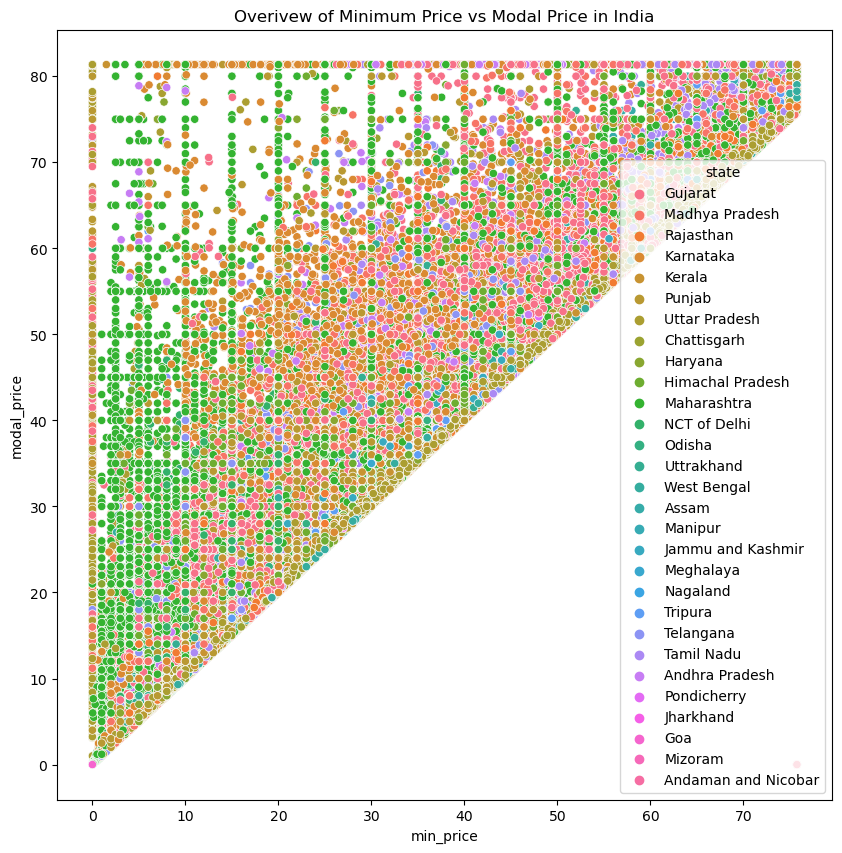

In [61]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = data['min_price'],y = data['modal_price'],hue = data['state'])
plt.title("Overivew of Minimum Price vs Modal Price in India")
sns.move_legend(ax,'upper left',bbox_to_anchor = (1,1))
plt.show()

## Unsupervised ML Algorithm

In [108]:
data.columns

Index(['commodity_name', 'state', 'district', 'market', 'min_price',
       'max_price', 'modal_price', 'date'],
      dtype='object')

In [110]:
req_data = data[[ 'min_price','max_price', 'modal_price']]
req_data

,min_price,max_price,modal_price
0,63.25,79.55,79.55
1,75.75,80.05,80.05
2,75.75,89.25,81.35
3,75.75,89.25,81.35
4,21.25,89.25,81.35
...,...,...,...
836972,75.75,89.25,81.35
836973,75.75,89.25,81.35
836974,75.75,89.25,81.35
836975,75.75,89.25,81.35



Normalization (Min-Max Scaling): This scales the features to a specific range, often between 0 and 1. It's appropriate when you have features with different ranges and you want to preserve the relative relationships between them.

Standardization (Z-score Scaling): This scales the features to have a mean of 0 and a standard deviation of 1. It's suitable when the features have different units or when you want to emphasize the deviations from the mean.


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(req_data)
data_scaled

array([[1.74535887, 1.99200343, 2.27721324],
       [2.35619265, 2.01334759, 2.30033346],
       [2.35619265, 2.40608012, 2.36044602],
       ...,
       [2.35619265, 2.40608012, 2.36044602],
       [2.35619265, 2.40608012, 2.36044602],
       [2.35619265, 2.40608012, 2.36044602]])

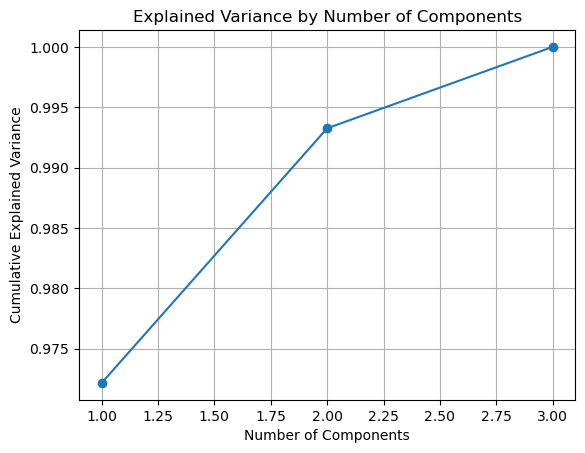

In [114]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include 
(the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 1 component.

In [120]:
# Applying PCA for dimensionality Reduction

pca = PCA(n_components=1)
data_pca = pca.fit_transform(data_scaled)
data_pca

array([[3.47442378],
       [3.85087824],
       [4.1122193 ],
       ...,
       [4.1122193 ],
       [4.1122193 ],
       [4.1122193 ]])

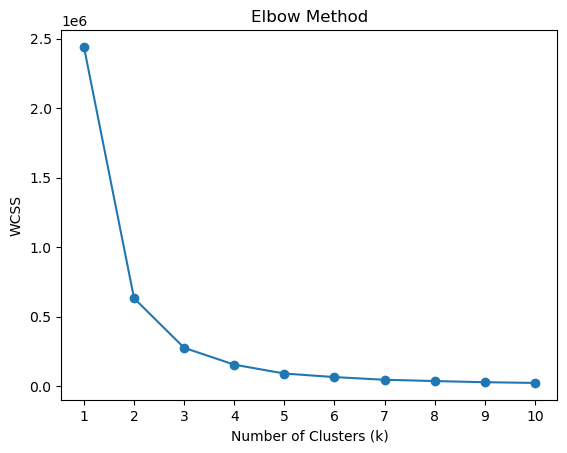

In [121]:
from sklearn.cluster import KMeans

k_values = range(1, 11)

# Calculate within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.show()

Identify the "Elbow" Point: The "elbow" point on the plot is where the distortion starts to level off. It's the point where increasing the number of clusters no longer significantly reduces the distortion.

Choose the Optimal k: The optimal number of clusters (k) is often considered to be the value at the "elbow" point. This value provides a balance between capturing meaningful patterns in the data and avoiding excessive fragmentation.

In [66]:
data_pca

array([[ 0.15332945, -0.26121363],
       [-1.46692281, -0.18229713],
       [-1.62932519, -0.42184233],
       ...,
       [ 3.86788324, -0.26321904],
       [ 2.61488138, -1.65495554],
       [ 3.75991325, -0.25702582]])

In [118]:
n_clusters = 4

# Fit K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_pca)

# Get cluster assignments
cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
req_data['Cluster'] = cluster_labels

#sns.scatterplot(data = req_data,x = 'Area',y = 'Production',hue = 'Cluster')

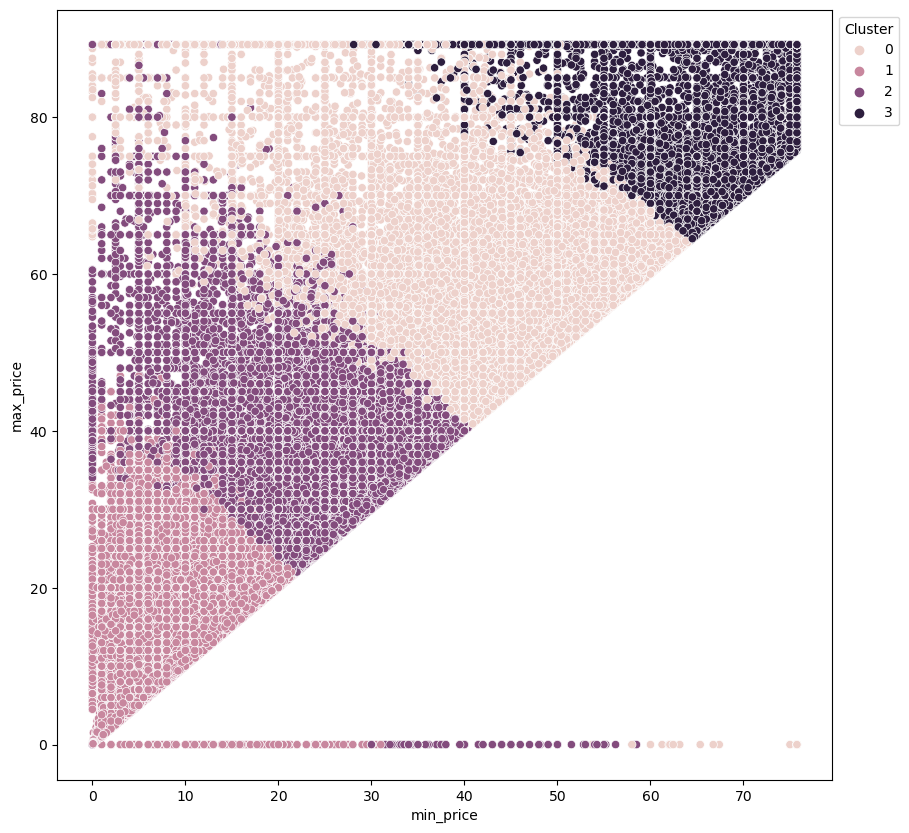

In [119]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = req_data,x = 'min_price',y = 'max_price',hue = 'Cluster')
sns.move_legend(ax,'upper left',bbox_to_anchor = (1,1))
plt.show()

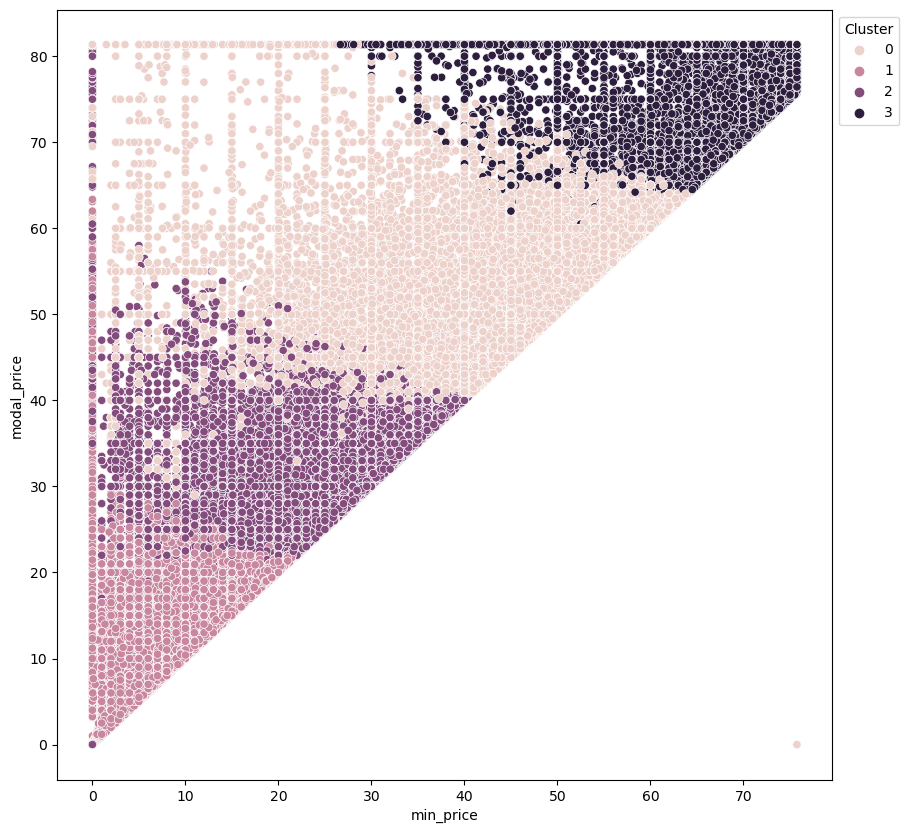

In [122]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = req_data,x = 'min_price',y = 'modal_price',hue = 'Cluster')
sns.move_legend(ax,'upper left',bbox_to_anchor = (1,1))
plt.show()

In [123]:
req_data

,min_price,max_price,modal_price,Cluster
0,63.25,79.55,79.55,3
1,75.75,80.05,80.05,3
2,75.75,89.25,81.35,3
3,75.75,89.25,81.35,3
4,21.25,89.25,81.35,0
...,...,...,...,...
836972,75.75,89.25,81.35,3
836973,75.75,89.25,81.35,3
836974,75.75,89.25,81.35,3
836975,75.75,89.25,81.35,3


In [124]:
from collections import Counter

Counter(cluster_labels)

Counter({3: 87480, 0: 124633, 1: 404950, 2: 219793})

In [156]:
df_Cluster = data.copy(deep = True)
df_Cluster['Pred_Cluster'] = cluster_labels
df_Cluster.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,Pred_Cluster
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,3
1,Ajwan,Gujarat,Banaskanth,Dhanera,75.75,80.05,80.05,2019-05-22,3
2,Ajwan,Gujarat,Jamnagar,Jamnagar,75.75,89.25,81.35,2019-05-22,3
3,Ajwan,Gujarat,Mehsana,Kadi,75.75,89.25,81.35,2019-05-22,3
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,89.25,81.35,2019-05-22,0


In [157]:
df_Cluster['Pred_Cluster'].value_counts()

1    404950
2    219793
0    124633
3     87480
Name: Pred_Cluster, dtype: int64

In [160]:
df_Cluster.to_csv("CropMarketPrice_Cluster.csv",encoding = "utf-8")


In [7]:
df = pd.read_csv("CropMarketPrice_Cluster.csv")
df

,Unnamed: 0,commodity_name,state,district,market,min_price,max_price,modal_price,date,Pred_Cluster
0,0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,3
1,1,Ajwan,Gujarat,Banaskanth,Dhanera,75.75,80.05,80.05,2019-05-22,3
2,2,Ajwan,Gujarat,Jamnagar,Jamnagar,75.75,89.25,81.35,2019-05-22,3
3,3,Ajwan,Gujarat,Mehsana,Kadi,75.75,89.25,81.35,2019-05-22,3
4,4,Ajwan,Gujarat,Mehsana,Unjha,21.25,89.25,81.35,2019-05-22,0
...,...,...,...,...,...,...,...,...,...,...
836851,836972,Arhar (Tur/Red Gram)(Whole),Gujarat,Bharuch,Jambusar(Kaavi),75.75,89.25,81.35,2021-10-06,3
836852,836973,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Jasdan,75.75,89.25,81.35,2021-10-06,3
836853,836974,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Rajkot,75.75,89.25,81.35,2021-10-06,3
836854,836975,Arhar (Tur/Red Gram)(Whole),Gujarat,Junagarh,Visavadar,75.75,89.25,81.35,2021-10-06,3


In [11]:
df['commodity_name'].value_counts()

Onion            44908
Tomato           42714
Wheat            41172
Potato           37808
Brinjal          33686
                 ...  
Butter               3
Lukad                2
Siddota              1
Sunhemp              1
Almond(Badam)        1
Name: commodity_name, Length: 248, dtype: int64

In [15]:
## Changing the name of a State as it was spelled wrong
df['state'] = df['state'].apply(lambda x: "Uttarakhand" if x == "Uttrakhand" else x)

In [17]:
df.to_csv("CropMarketPrice_Cluster.csv",encoding = "utf-8")